In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [3]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [4]:
# Import the time library and the datetime module from the datetime library
import time
from datetime import datetime

In [5]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [6]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [7]:
from citipy import citipy

In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

618

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | wanning
Processing Record 2 of Set 1 | saint-philippe
Processing Record 3 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 4 of Set 1 | hermanus
Processing Record 5 of Set 1 | port elizabeth
Processing Record 6 of Set 1 | roald
Processing Record 7 of Set 1 | kamenskoye
City not found. Skipping...
Processing Record 8 of Set 1 | upernavik
Processing Record 9 of Set 1 | cape town
Processing Record 10 of Set 1 | vaini
Processing Record 11 of Set 1 | kulu
Processing Record 12 of Set 1 | mahebourg
Processing Record 13 of Set 1 | chokurdakh
Processing Record 14 of Set 1 | saskylakh
Processing Record 15 of Set 1 | jurm
Processing Record 16 of Set 1 | bagdarin
Processing Record 17 of Set 1 | bethel
Processing Record 18 of Set 1 | santa ana
Processing Record 19 of Set 1 | kapaa
Processing Record 20 of Set 1 | ribeira grande
Processing Record 21 of Set 1 | chuy
Processing Record 22 of Se

Processing Record 39 of Set 4 | vostok
Processing Record 40 of Set 4 | east london
Processing Record 41 of Set 4 | mugur-aksy
Processing Record 42 of Set 4 | nabire
Processing Record 43 of Set 4 | klaksvik
Processing Record 44 of Set 4 | saleaula
City not found. Skipping...
Processing Record 45 of Set 4 | amderma
City not found. Skipping...
Processing Record 46 of Set 4 | yerbogachen
Processing Record 47 of Set 4 | kichera
Processing Record 48 of Set 4 | lanas
Processing Record 49 of Set 4 | seversk
Processing Record 50 of Set 4 | ereymentau
Processing Record 1 of Set 5 | grand centre
City not found. Skipping...
Processing Record 2 of Set 5 | ilulissat
Processing Record 3 of Set 5 | corrente
Processing Record 4 of Set 5 | bambous virieux
Processing Record 5 of Set 5 | port hedland
Processing Record 6 of Set 5 | bekhtery
Processing Record 7 of Set 5 | luau
Processing Record 8 of Set 5 | praya
Processing Record 9 of Set 5 | talnakh
Processing Record 10 of Set 5 | grand-lahou
Processing R

Processing Record 31 of Set 8 | maragogi
Processing Record 32 of Set 8 | cozumel
Processing Record 33 of Set 8 | saint-joseph
Processing Record 34 of Set 8 | namibe
Processing Record 35 of Set 8 | ruatoria
City not found. Skipping...
Processing Record 36 of Set 8 | del rio
Processing Record 37 of Set 8 | georgetown
Processing Record 38 of Set 8 | tecoanapa
Processing Record 39 of Set 8 | vestmannaeyjar
Processing Record 40 of Set 8 | zhuhai
Processing Record 41 of Set 8 | peno
Processing Record 42 of Set 8 | balabac
Processing Record 43 of Set 8 | kaeo
Processing Record 44 of Set 8 | katangli
Processing Record 45 of Set 8 | camacupa
Processing Record 46 of Set 8 | muroto
Processing Record 47 of Set 8 | newcastle
Processing Record 48 of Set 8 | surt
Processing Record 49 of Set 8 | wamba
Processing Record 50 of Set 8 | coffs harbour
Processing Record 1 of Set 9 | praia
Processing Record 2 of Set 9 | ngorongoro
Processing Record 3 of Set 9 | tefe
Processing Record 4 of Set 9 | newport
Pro

Processing Record 18 of Set 12 | tonota
Processing Record 19 of Set 12 | boguchany
Processing Record 20 of Set 12 | staryy nadym
Processing Record 21 of Set 12 | malwan
City not found. Skipping...
Processing Record 22 of Set 12 | lolua
City not found. Skipping...
Processing Record 23 of Set 12 | pacifica
Processing Record 24 of Set 12 | tieling
Processing Record 25 of Set 12 | walvis bay
Processing Record 26 of Set 12 | sao miguel do araguaia
Processing Record 27 of Set 12 | crossville
Processing Record 28 of Set 12 | koroni
Processing Record 29 of Set 12 | shanghai
Processing Record 30 of Set 12 | prescott
Processing Record 31 of Set 12 | binzhou
Processing Record 32 of Set 12 | bilma
Processing Record 33 of Set 12 | kuytun
Processing Record 34 of Set 12 | ljungby
Processing Record 35 of Set 12 | clarence town
Processing Record 36 of Set 12 | aldan
Processing Record 37 of Set 12 | hihifo
City not found. Skipping...
Processing Record 38 of Set 12 | chirongui
Processing Record 39 of Set

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Wanning,18.8003,110.3967,82.44,74,20,7.38,CN,2023-04-29 09:44:08
1,Saint-Philippe,-21.3585,55.7679,83.79,68,17,10.16,RE,2023-04-29 09:44:08
2,Hermanus,-34.4187,19.2345,65.80,68,99,9.40,ZA,2023-04-29 09:44:09
3,Port Elizabeth,-33.9180,25.5701,73.09,54,40,21.85,ZA,2023-04-29 09:44:09
4,Roald,62.5833,6.1333,41.14,70,75,8.05,NO,2023-04-29 09:44:09
5,Upernavik,72.7868,-56.1549,18.91,69,100,2.77,GL,2023-04-29 09:44:10
6,Cape Town,-33.9258,18.4232,69.12,75,75,4.00,ZA,2023-04-29 09:40:41
7,Vaini,-21.2000,-175.2000,77.16,94,20,6.91,TO,2023-04-29 09:44:10
8,Kulu,39.0951,33.0799,47.55,53,91,4.45,TR,2023-04-29 09:44:10
9,Mahebourg,-20.4081,57.7000,85.24,65,40,5.75,MU,2023-04-29 09:44:10


In [11]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_reordered_df = city_data_df[new_column_order]
city_data_reordered_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Wanning,CN,2023-04-29 09:44:08,18.8003,110.3967,82.44,74,20,7.38
1,Saint-Philippe,RE,2023-04-29 09:44:08,-21.3585,55.7679,83.79,68,17,10.16
2,Hermanus,ZA,2023-04-29 09:44:09,-34.4187,19.2345,65.80,68,99,9.40
3,Port Elizabeth,ZA,2023-04-29 09:44:09,-33.9180,25.5701,73.09,54,40,21.85
4,Roald,NO,2023-04-29 09:44:09,62.5833,6.1333,41.14,70,75,8.05


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_reordered_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

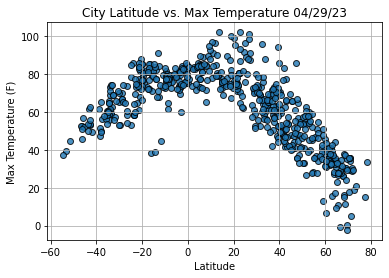

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

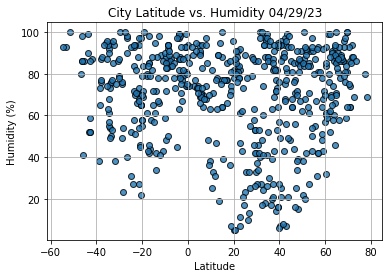

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()